# Week 4 Assignment

# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Sfax, Gouvernorat de Sfax, Tunisia**, or **Tunisia** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Sfax, Gouvernorat de Sfax, Tunisia** to Ann Arbor, USA. In that case at least one source file must be about **Sfax, Gouvernorat de Sfax, Tunisia**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Sfax, Gouvernorat de Sfax, Tunisia** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

### Import the needed packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Read the datasets

In [2]:
dft = pd.read_csv('https://raw.githubusercontent.com/maky-hnou/Applied-Plotting-Charting-Data-Representation-in-Python/master/datasets/temperature_sfax.csv')
dfs = pd.read_csv('https://raw.githubusercontent.com/maky-hnou/Applied-Plotting-Charting-Data-Representation-in-Python/master/datasets/sunshine_duration_sfax.csv') 

### Clean the temperature dataset

In [3]:
# Remove the non needed rows
dft = dft.drop(dft.index[0:9])

# Rename the columns
dft = dft.rename(columns={'location': 'Date', 'Sfax': 'T_min', 'Sfax.1': 'T_max', 'Sfax.2': 'T_mean'})

# Reset the index
dft.reset_index(inplace=True, drop=True)

# Remove timestamp from the Date column
dft['Date'] = dft['Date'].map(lambda x: str(x)[:-5])

# Format the dates in Date column
dft['Date'] = pd.to_datetime(dft['Date'], format='%Y%m%d')

# Change the type of the other columns to float
dft[['T_min', 'T_max', 'T_mean']] = dft[['T_min', 'T_max', 'T_mean']].astype(float)

### Clean sunshine duration dataset

In [4]:
# Remove the non needed rows
dfs = dfs.drop(dfs.index[0:9])

# Rename the columns
dfs = dfs.rename(columns={'location': 'Date', 'Sfax': 'Sunshine_duration'})

# Reset the index
dfs.reset_index(inplace=True, drop=True)

# Remove timestamp from the Date column
dfs['Date'] = dfs['Date'].map(lambda x: str(x)[:-5])

# Format the dates in Date column
dfs['Date'] = pd.to_datetime(dfs['Date'], format='%Y%m%d')

# Set the Date column as index
dfs.set_index('Date', inplace=True)

# Change the type of the other columns to float
dfs[['Sunshine_duration']] = dfs[['Sunshine_duration']].astype(float)

### Get the mean of sunshine duration per month

In [5]:
months=dfs.index.month
monthly_avg=dfs.groupby(months).Sunshine_duration.mean()

### Plot the graphs

<Figure size 432x288 with 0 Axes>

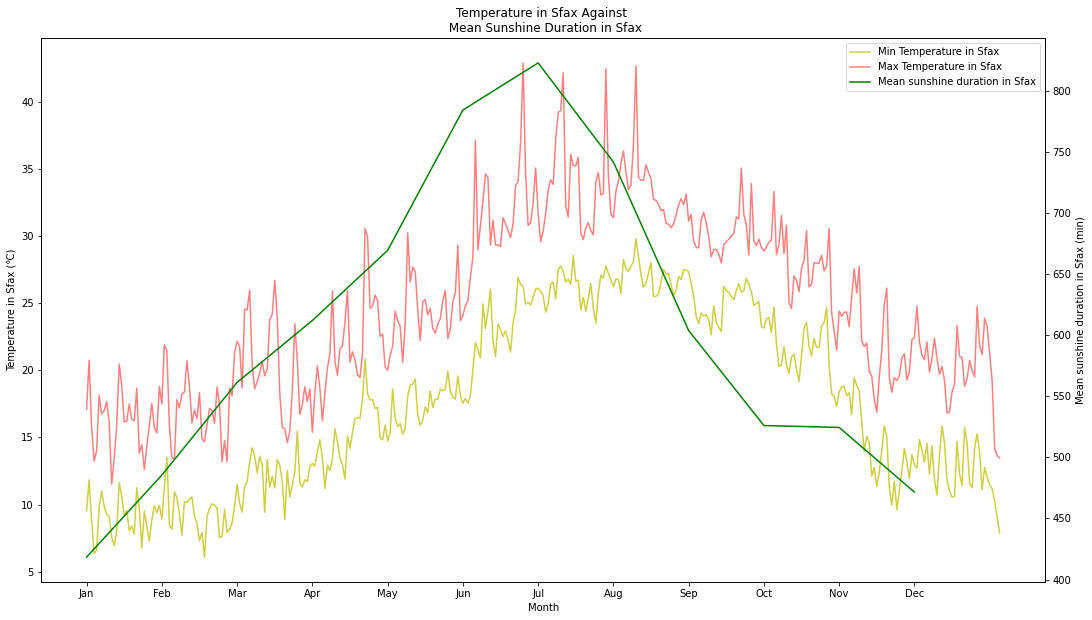

In [6]:
# Set the figure
plt.figure()

# Set the figure size
fig, ax1 = plt.subplots(figsize=(18, 10))

# Create a twin axes sharing the xaxis.
ax2 = ax1.twinx()

# Plot the min and max temperature
ax1.plot(dft['T_min'], 'y', alpha = 0.75, label = 'Min Temperature in Sfax')
ax1.plot(dft['T_max'], 'r', alpha = 0.5, label = 'Max Temperature in Sfax')


# Plot the mean sunshine duration
a = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
ax2.plot(a, monthly_avg, 'g', label = 'Mean sunshine duration in Sfax')

# Get the legends and labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Set the labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature in Sfax (℃)')
ax2.set_ylabel('Mean sunshine duration in Sfax (min)')
plt.title('Temperature in Sfax Against \n Mean Sunshine Duration in Sfax')

# Plot the months on the x axis
Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(a, Month_name)

# Show the graphs
plt.show()